In [38]:
# Import libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [62]:
# import data:
data = pd.read_csv(r'youtube-comments.csv',
                 lineterminator='\n')

data.head()

,Name,Comment,Time,Likes,Reply Count
0,freeCodeCamp.org,"Click the ""JOIN"" button below the video to sup...",2020-04-08T23:11:28Z,952,41.0
1,SHIVANI GUPTA,Getting this error after running command stude...,2021-11-12T14:46:19Z,0,NaN
2,Ricardo Velasquez,@Raghvendra Swarnakar man did you find a solut...,2021-10-25T09:00:29Z,0,NaN
3,Mohammed Aminu,can anybody help me with idea on how to delete...,2021-09-13T07:49:57Z,0,NaN
4,Rishav Gupta,where can i find the code for creating that co...,2021-08-31T15:54:20Z,0,NaN


In [63]:
# Clean the text:

# Function
def cleanTxt(text):
  text = re.sub(r'[^\w]', ' ', text)

  return text


data['Comment'] = data['Comment'].apply(cleanTxt)


In [65]:
# get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Columns
data['Subjectivity'] = data['Comment'].apply(getSubjectivity)
data['Polarity'] = data['Comment'].apply(getPolarity)

data

,Name,Comment,Time,Likes,Reply Count,Subjectivity,Polarity
0,freeCodeCamp.org,Click the JOIN button below the video to sup...,2020-04-08T23:11:28Z,952,41.0,0.000000,0.000000
1,SHIVANI GUPTA,Getting this error after running command stude...,2021-11-12T14:46:19Z,0,NaN,0.000000,0.000000
2,Ricardo Velasquez,Raghvendra Swarnakar man did you find a solut...,2021-10-25T09:00:29Z,0,NaN,0.125000,0.000000
3,Mohammed Aminu,can anybody help me with idea on how to delete...,2021-09-13T07:49:57Z,0,NaN,1.000000,0.600000
4,Rishav Gupta,where can i find the code for creating that co...,2021-08-31T15:54:20Z,0,NaN,0.400000,-0.300000
...,...,...,...,...,...,...,...
14122,Omaiz Ahmed,Amazing video Explained in detail Thanks edu...,2019-10-10T07:23:13Z,4,0.0,0.550000,0.400000
14123,Dharmesh Panchal,Info graphics is very accurate for grab subject,2019-10-05T03:59:29Z,6,1.0,0.578333,0.176667
14124,edureka!,Thanks,2019-10-06T06:23:30Z,1,NaN,0.200000,0.200000
14125,Sharan Hinduja,Very well explained But try to explain it slo...,2019-10-04T17:21:30Z,7,1.0,0.434722,0.136111


<function matplotlib.pyplot.show(close=None, block=None)>

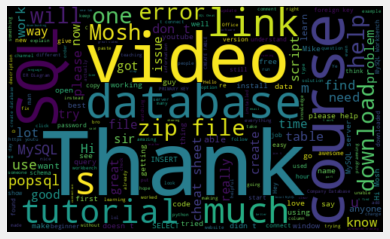

In [68]:
# WordCloud
allWords = ' '.join( [cmts for cmts in data['Comment']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

In [69]:
# function to compute analysis
def getAnalysis(score):
  if score < 0 :
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)


,Name,Comment,Time,Likes,Reply Count,Subjectivity,Polarity,Analysis
0,freeCodeCamp.org,Click the JOIN button below the video to sup...,2020-04-08T23:11:28Z,952,41.0,0.000000,0.000000,Neutral
1,SHIVANI GUPTA,Getting this error after running command stude...,2021-11-12T14:46:19Z,0,NaN,0.000000,0.000000,Neutral
2,Ricardo Velasquez,Raghvendra Swarnakar man did you find a solut...,2021-10-25T09:00:29Z,0,NaN,0.125000,0.000000,Neutral
3,Mohammed Aminu,can anybody help me with idea on how to delete...,2021-09-13T07:49:57Z,0,NaN,1.000000,0.600000,Positive
4,Rishav Gupta,where can i find the code for creating that co...,2021-08-31T15:54:20Z,0,NaN,0.400000,-0.300000,Negative
...,...,...,...,...,...,...,...,...
14122,Omaiz Ahmed,Amazing video Explained in detail Thanks edu...,2019-10-10T07:23:13Z,4,0.0,0.550000,0.400000,Positive
14123,Dharmesh Panchal,Info graphics is very accurate for grab subject,2019-10-05T03:59:29Z,6,1.0,0.578333,0.176667,Positive
14124,edureka!,Thanks,2019-10-06T06:23:30Z,1,NaN,0.200000,0.200000,Positive
14125,Sharan Hinduja,Very well explained But try to explain it slo...,2019-10-04T17:21:30Z,7,1.0,0.434722,0.136111,Positive


In [75]:
# % Percentages:
pcomments = data[data.Analysis == 'Positive']
pcomments = pcomments['Comment']

print('Positive: ' +str(round((pcomments.shape[0]/data.shape[0])*100, 1))+ '%')

ncomments = data[data.Analysis == 'Negative']
ncomments = ncomments['Comment']

print('Negative: ' +str(round((ncomments.shape[0]/data.shape[0])*100, 1))+ '%')

nucomments = data[data.Analysis == 'Neutral']
nucomments = nucomments['Comment']

print('Nuetral: ' +str(round((nucomments.shape[0]/data.shape[0])*100, 1))+ '%')

Positive: 46.0%
Negative: 9.3%
Nuetral: 44.7%


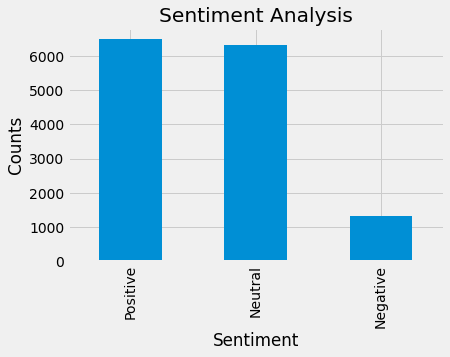

In [77]:
# Value Count
data['Analysis'].value_counts

# Plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind= 'bar')
plt.show()
